<a href="https://colab.research.google.com/github/nikunjsonule/Predict-the-Domestic-Market-Contract-Blow-Molding-Low-price./blob/main/Predict_Domestic_Market_Blow_Molding_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Main Objective: Predict the Domestic Market (Contract) Blow Molding, Low price.

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
#importing data and show first 5 rows
dataset = pd.read_csv("/content/drive/MyDrive/tayio.ai /Random Price Dataset Trial Assignment.xlsx - Raw data.csv")
dataset.head()

,Date,"Domestic Market (Contract) Blow Molding, Low",Spot/Export Blow Molding,"Spot, Domestic",WTISPLC,MCOILBRENTEU,GASREGM,IMPCH,EXPCH,PRUBBUSDM,...,Russia_import,South_Africa_import,Turkey_import,Brazil_import,France_import,Germeny_import,United Kingdome_import,China_import,Japan_import,South_korea_import
0,01/01/2000,41,NaN,NaN,27.18,25.51,1.289,6902.1,863.1,29.207387,...,NaN,NaN,"6,833,222.00","2,649,293.00","35,239,920.00",NaN,NaN,NaN,NaN,NaN
1,01/02/2000,41,NaN,NaN,29.35,27.78,1.377,6584.4,972.7,33.391099,...,NaN,NaN,"5,647,987.00","2,787,667.00","36,716,752.00",NaN,NaN,NaN,NaN,NaN
2,01/03/2000,45,NaN,NaN,29.89,27.49,1.516,6424.1,1330.5,30.941913,...,NaN,NaN,"6,721,125.00","4,692,701.00","45,144,561.00",NaN,NaN,NaN,NaN,NaN
3,01/04/2000,47,NaN,NaN,25.74,22.76,1.465,7070.5,1227.5,31.930148,...,NaN,NaN,"7,169,182.00","2,565,068.00","32,240,349.00",NaN,NaN,NaN,NaN,NaN
4,01/05/2000,47,NaN,NaN,28.78,27.74,1.487,7850.2,1526.3,31.201702,...,NaN,NaN,"10,466,333.00","4,671,325.00","29,351,633.00",NaN,NaN,NaN,NaN,NaN


In [4]:
# Using this data frame for all analysis
blow_molding_data = dataset.copy()
blow_molding_data.head(10)

,Date,"Domestic Market (Contract) Blow Molding, Low",Spot/Export Blow Molding,"Spot, Domestic",WTISPLC,MCOILBRENTEU,GASREGM,IMPCH,EXPCH,PRUBBUSDM,...,Russia_import,South_Africa_import,Turkey_import,Brazil_import,France_import,Germeny_import,United Kingdome_import,China_import,Japan_import,South_korea_import
0,01/01/2000,41,NaN,NaN,27.18,25.51,1.289,6902.1,863.1,29.207387,...,NaN,NaN,"6,833,222.00","2,649,293.00","35,239,920.00",NaN,NaN,NaN,NaN,NaN
1,01/02/2000,41,NaN,NaN,29.35,27.78,1.377,6584.4,972.7,33.391099,...,NaN,NaN,"5,647,987.00","2,787,667.00","36,716,752.00",NaN,NaN,NaN,NaN,NaN
2,01/03/2000,45,NaN,NaN,29.89,27.49,1.516,6424.1,1330.5,30.941913,...,NaN,NaN,"6,721,125.00","4,692,701.00","45,144,561.00",NaN,NaN,NaN,NaN,NaN
3,01/04/2000,47,NaN,NaN,25.74,22.76,1.465,7070.5,1227.5,31.930148,...,NaN,NaN,"7,169,182.00","2,565,068.00","32,240,349.00",NaN,NaN,NaN,NaN,NaN
4,01/05/2000,47,NaN,NaN,28.78,27.74,1.487,7850.2,1526.3,31.201702,...,NaN,NaN,"10,466,333.00","4,671,325.00","29,351,633.00",NaN,NaN,NaN,NaN,NaN
5,01/06/2000,47,NaN,NaN,31.83,29.80,1.633,8541.7,1335.6,30.386655,...,NaN,NaN,"7,718,634.00","4,867,275.00","38,759,239.00",NaN,NaN,NaN,NaN,NaN
6,01/07/2000,47,NaN,NaN,29.77,28.68,1.551,9246.4,1642.8,29.402108,...,NaN,NaN,"8,116,066.00","3,456,520.00","39,657,146.00",NaN,NaN,NaN,NaN,NaN
7,01/08/2000,46,NaN,NaN,31.22,30.20,1.465,10054.0,1429.0,30.308517,...,NaN,NaN,"7,500,197.00","4,651,157.00","37,666,092.00",NaN,NaN,NaN,NaN,NaN
8,01/09/2000,45,NaN,NaN,33.88,33.14,1.550,10061.7,1333.3,29.812489,...,NaN,NaN,"10,029,976.00","6,048,563.00","35,989,846.00",NaN,NaN,NaN,NaN,NaN
9,01/10/2000,43,NaN,NaN,33.08,30.96,1.532,10611.6,1487.3,30.127775,...,NaN,NaN,"8,885,054.00","6,294,415.00","34,828,414.00",NaN,NaN,NaN,NaN,NaN


In [5]:
# Columns in the datasets
blow_molding_data.columns

Index(['Date', 'Domestic Market (Contract) Blow Molding, Low',
       'Spot/Export Blow Molding', 'Spot, Domestic', 'WTISPLC', 'MCOILBRENTEU',
       'GASREGM', 'IMPCH', 'EXPCH', 'PRUBBUSDM', 'WPUFD4111',
       'PCU325211325211', 'PCU32611332611301', 'WPU0915021625',
       'PCU3252132521', 'MHHNGSP', 'WPU072205011', 'PCU32611132611115',
       'PCU32611332611301.1', 'PCU32611132611112', 'WPU0915021622',
       'Producer Price Index by Industry: Plastics Material and Resins Manufacturing: Thermoplastic Resins and Plastics Materials ',
       'Australia _export', 'Canada_export', 'Saudi_export', 'Usa_export',
       'India_export', 'Russia_export', 'South_Africa_export', 'Turkey',
       'Brazil', 'France_export', 'Germeny_export', 'United Kingdome_export',
       'China_export', 'Australia _import', 'Canada_import', 'Saudi_import',
       'Usa_import', 'India_import', 'Russia_import', 'South_Africa_import',
       'Turkey_import', 'Brazil_import', 'France_import', 'Germeny_import',
  

In [6]:
blow_molding_data.shape

(276, 50)

## Data Preprocessing

In [7]:
#Find out the data type of each column 
blow_molding_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276 entries, 0 to 275
Data columns (total 50 columns):
 #   Column                                                                                                                      Non-Null Count  Dtype  
---  ------                                                                                                                      --------------  -----  
 0   Date                                                                                                                        276 non-null    object 
 1   Domestic Market (Contract) Blow Molding, Low                                                                                276 non-null    int64  
 2   Spot/Export Blow Molding                                                                                                    185 non-null    float64
 3   Spot, Domestic                                                                                                              1

In [8]:
null_counts = blow_molding_data.isnull().sum()
print(null_counts)

Date                                                                                                                            0
Domestic Market (Contract) Blow Molding, Low                                                                                    0
Spot/Export Blow Molding                                                                                                       91
Spot, Domestic                                                                                                                151
WTISPLC                                                                                                                         0
MCOILBRENTEU                                                                                                                    0
GASREGM                                                                                                                         0
IMPCH                                                                                     

In [9]:
# data description 
blow_molding_data.describe()

,"Domestic Market (Contract) Blow Molding, Low",Spot/Export Blow Molding,"Spot, Domestic",WTISPLC,MCOILBRENTEU,GASREGM,IMPCH,EXPCH,PRUBBUSDM,WPUFD4111,...,WPU0915021625,PCU3252132521,MHHNGSP,WPU072205011,PCU32611132611115,PCU32611332611301.1,PCU32611132611112,WPU0915021622,Producer Price Index by Industry: Plastics Material and Resins Manufacturing: Thermoplastic Resins and Plastics Materials,South_korea_import
count,276.000000,185.000000,125.000000,276.000000,276.000000,276.000000,275.000000,275.000000,275.000000,275.000000,...,132.000000,228.000000,276.000000,115.000000,115.000000,204.000000,115.000000,133.000000,276.000000,0.0
mean,72.376812,57.979730,60.396000,62.505688,65.403768,2.570399,29591.894216,7176.495470,89.579463,185.978265,...,108.867076,164.035908,4.515036,106.618957,135.447026,201.243686,128.043139,111.183992,222.319692,NaN
std,19.413099,13.116195,12.647484,26.065922,29.612183,0.780782,12303.526704,3764.254058,46.390987,31.712684,...,10.688070,25.562316,2.171598,11.893776,15.067526,50.819024,14.146347,12.070776,51.941508,NaN
min,32.000000,28.000000,33.250000,16.550000,18.380000,1.086000,6375.600000,863.100000,22.119907,135.000000,...,99.500000,100.000000,1.630000,94.100000,100.000000,102.800000,100.000000,99.200000,122.900000,NaN
25%,57.750000,49.000000,53.000000,41.000000,42.727500,1.982000,20508.605665,3644.347996,60.831129,155.650000,...,103.000000,145.000000,2.877500,99.700000,126.900000,152.800000,120.000000,104.100000,193.375000,NaN
50%,73.000000,59.000000,59.000000,59.280000,62.770000,2.555000,31563.988160,8080.515063,78.408574,193.400000,...,105.000000,165.550000,3.965000,102.000000,130.200000,215.600000,123.100000,107.200000,227.550000,NaN
75%,86.000000,67.000000,67.500000,84.170000,85.587500,3.149000,39575.405920,9741.468033,107.593858,208.600000,...,107.525000,176.950000,5.735000,106.250000,133.050000,231.900000,127.150000,111.400000,249.000000,NaN
max,108.000000,92.000000,100.750000,133.930000,132.720000,4.929000,52081.070500,16678.510020,280.787619,278.025000,...,143.787000,231.260000,13.420000,138.090000,179.097000,311.130000,168.906000,147.624000,359.606000,NaN


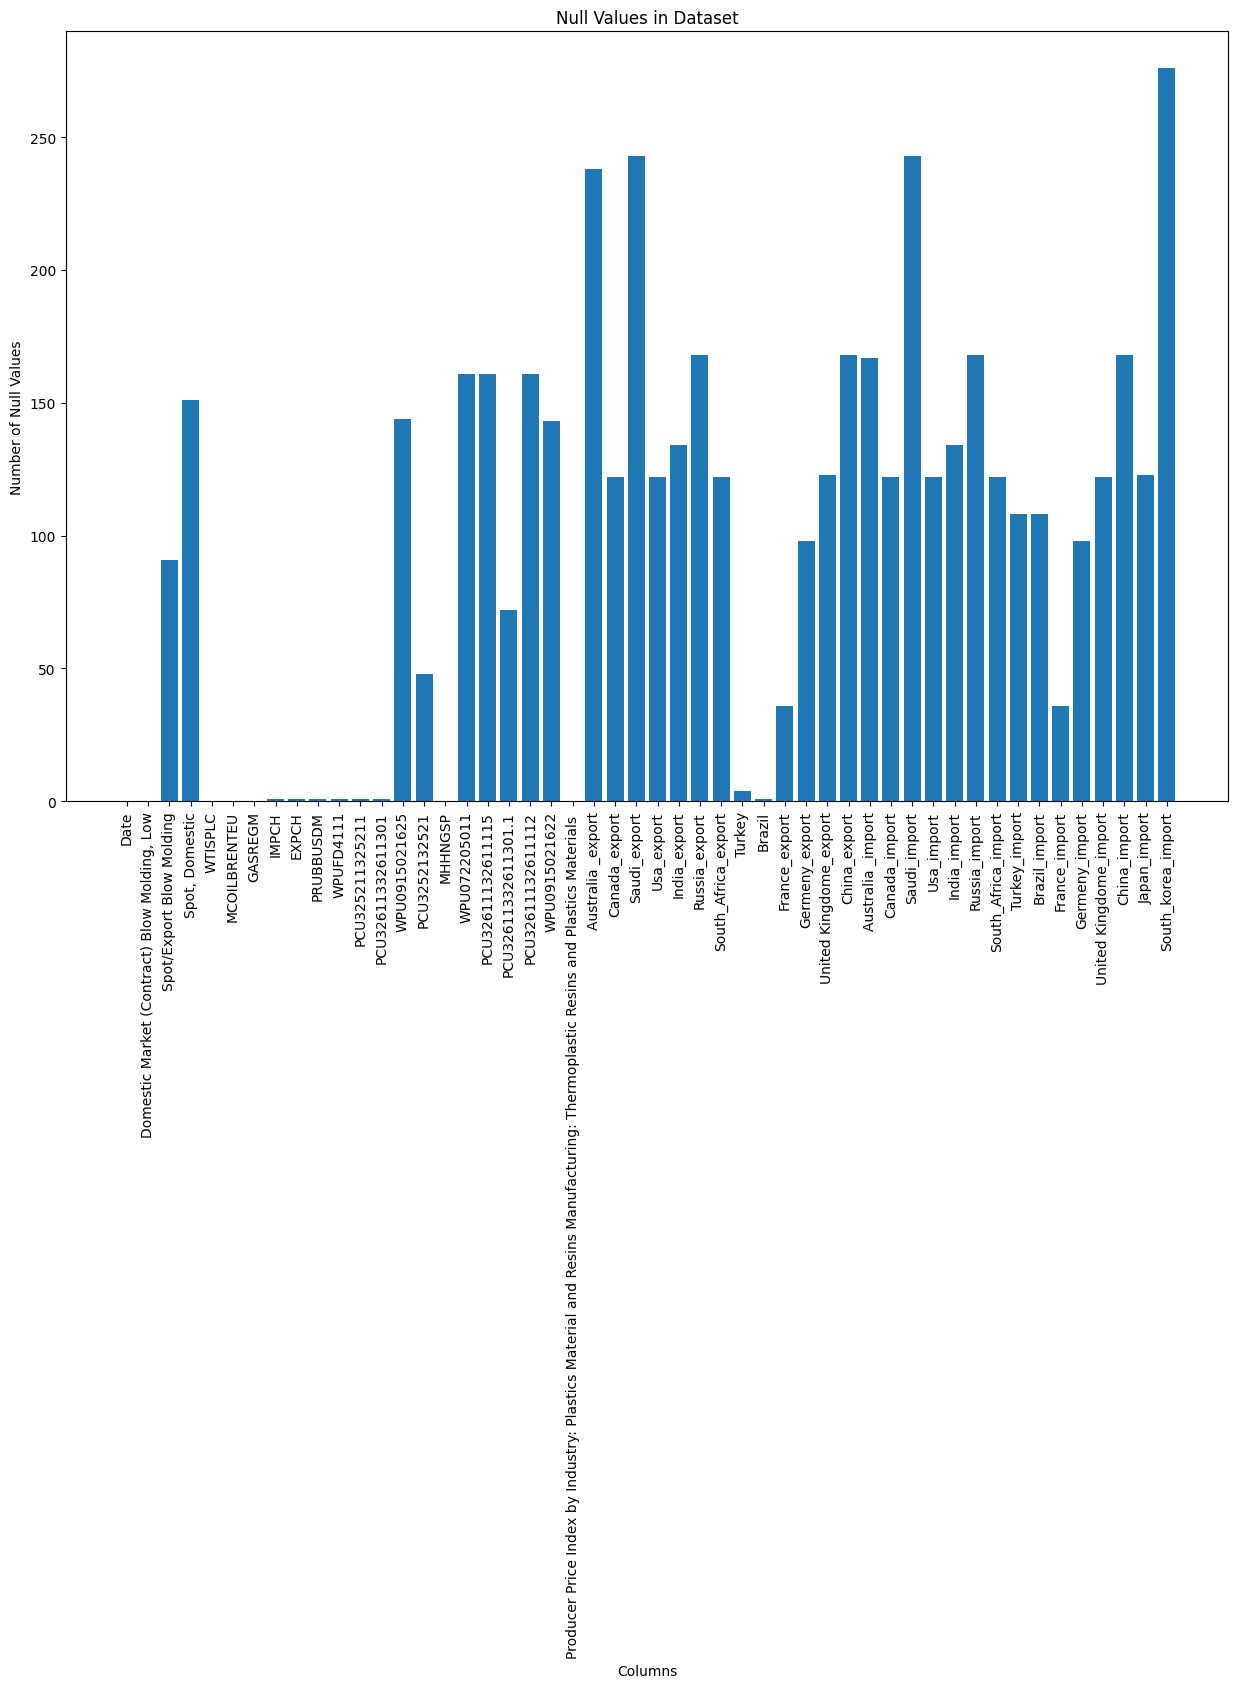

In [10]:
# Create a bar graph to show the number of null values in each column
plt.figure(figsize=(15, 10))
plt.bar(null_counts.index, null_counts.values)
plt.xticks(rotation=90)
plt.xlabel('Columns')
plt.ylabel('Number of Null Values')
plt.title('Null Values in Dataset')
plt.show()

We have lot of null values in export and import country features.

>Australia export, Saudi export, Saudi import and South Korea import has highest number null values.





In [11]:
blow_molding_data.describe(include = object)

,Date,Australia _export,Canada_export,Saudi_export,Usa_export,India_export,Russia_export,South_Africa_export,Turkey,Brazil,...,India_import,Russia_import,South_Africa_import,Turkey_import,Brazil_import,France_import,Germeny_import,United Kingdome_import,China_import,Japan_import
count,276,38,154,33,154,142,108,154,272,275,...,142,108,154,168,168,240,178,154,108,153
unique,276,38,154,33,154,142,108,154,272,275,...,142,108,154,168,168,240,178,154,108,153
top,01/01/2000,"4,88,137","85,264,272.00","44,61,42,297","243,608,493.00","37,773,078.00","23,984,758.00","805,536.00","61,808.00","10,352,529.00",...,"35,649,297.00","47,176,610.00","9,723,836.00","6,833,222.00","2,649,293.00","35,239,920.00","122,744,998.00","52,677,816.00","452,461,873.00","3,133,547.00"
freq,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [12]:
 #get all categorical columns in the dataframe
categorical_col = blow_molding_data.select_dtypes(include=['object']).columns.tolist()
print(categorical_col)

['Date', 'Australia _export', 'Canada_export', 'Saudi_export', 'Usa_export', 'India_export', 'Russia_export', 'South_Africa_export', 'Turkey', 'Brazil', 'France_export', 'Germeny_export', 'United Kingdome_export', 'China_export', 'Australia _import', 'Canada_import', 'Saudi_import', 'Usa_import', 'India_import', 'Russia_import', 'South_Africa_import', 'Turkey_import', 'Brazil_import', 'France_import', 'Germeny_import', 'United Kingdome_import', 'China_import', 'Japan_import']


In [13]:
 # get all numerical columns in the dataframe
num_cols = blow_molding_data.select_dtypes(include=['int64', 'float64'])
num_cols.head(8)

,"Domestic Market (Contract) Blow Molding, Low",Spot/Export Blow Molding,"Spot, Domestic",WTISPLC,MCOILBRENTEU,GASREGM,IMPCH,EXPCH,PRUBBUSDM,WPUFD4111,...,WPU0915021625,PCU3252132521,MHHNGSP,WPU072205011,PCU32611132611115,PCU32611332611301.1,PCU32611132611112,WPU0915021622,Producer Price Index by Industry: Plastics Material and Resins Manufacturing: Thermoplastic Resins and Plastics Materials,South_korea_import
0,41,NaN,NaN,27.18,25.51,1.289,6902.1,863.1,29.207387,135.0,...,NaN,NaN,2.42,NaN,NaN,106.3,NaN,NaN,139.4,NaN
1,41,NaN,NaN,29.35,27.78,1.377,6584.4,972.7,33.391099,136.0,...,NaN,NaN,2.66,NaN,NaN,105.6,NaN,NaN,141.7,NaN
2,45,NaN,NaN,29.89,27.49,1.516,6424.1,1330.5,30.941913,136.0,...,NaN,NaN,2.79,NaN,NaN,106.1,NaN,NaN,146.3,NaN
3,47,NaN,NaN,25.74,22.76,1.465,7070.5,1227.5,31.930148,137.3,...,NaN,NaN,3.04,NaN,NaN,106.9,NaN,NaN,151.4,NaN
4,47,NaN,NaN,28.78,27.74,1.487,7850.2,1526.3,31.201702,138.2,...,NaN,NaN,3.59,NaN,NaN,106.3,NaN,NaN,155.6,NaN
5,47,NaN,NaN,31.83,29.80,1.633,8541.7,1335.6,30.386655,137.6,...,NaN,NaN,4.29,NaN,NaN,105.6,NaN,NaN,155.9,NaN
6,47,NaN,NaN,29.77,28.68,1.551,9246.4,1642.8,29.402108,137.5,...,NaN,NaN,3.99,NaN,NaN,105.6,NaN,NaN,153.8,NaN
7,46,NaN,NaN,31.22,30.20,1.465,10054.0,1429.0,30.308517,137.2,...,NaN,NaN,4.43,NaN,NaN,105.6,NaN,NaN,153.5,NaN


In [14]:
# Set the display options to show the full column names and values
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)

In [15]:
blow_molding_data.head(5)

,Date,"Domestic Market (Contract) Blow Molding, Low",Spot/Export Blow Molding,"Spot, Domestic",WTISPLC,MCOILBRENTEU,GASREGM,IMPCH,EXPCH,PRUBBUSDM,WPUFD4111,PCU325211325211,PCU32611332611301,WPU0915021625,PCU3252132521,MHHNGSP,WPU072205011,PCU32611132611115,PCU32611332611301.1,PCU32611132611112,WPU0915021622,Producer Price Index by Industry: Plastics Material and Resins Manufacturing: Thermoplastic Resins and Plastics Materials,Australia _export,Canada_export,Saudi_export,Usa_export,India_export,Russia_export,South_Africa_export,Turkey,Brazil,France_export,Germeny_export,United Kingdome_export,China_export,Australia _import,Canada_import,Saudi_import,Usa_import,India_import,Russia_import,South_Africa_import,Turkey_import,Brazil_import,France_import,Germeny_import,United Kingdome_import,China_import,Japan_import,South_korea_import
0,01/01/2000,41,NaN,NaN,27.18,25.51,1.289,6902.1,863.1,29.207387,135.0,158.3,106.3,NaN,NaN,2.42,NaN,NaN,106.3,NaN,NaN,139.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"61,808.00","10,352,529.00","29,327,224.00",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"6,833,222.00","2,649,293.00","35,239,920.00",NaN,NaN,NaN,NaN,NaN
1,01/02/2000,41,NaN,NaN,29.35,27.78,1.377,6584.4,972.7,33.391099,136.0,159.5,105.6,NaN,NaN,2.66,NaN,NaN,105.6,NaN,NaN,141.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"450,675.00","8,844,172.00","33,506,035.00",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"5,647,987.00","2,787,667.00","36,716,752.00",NaN,NaN,NaN,NaN,NaN
2,01/03/2000,45,NaN,NaN,29.89,27.49,1.516,6424.1,1330.5,30.941913,136.0,163.2,106.1,NaN,NaN,2.79,NaN,NaN,106.1,NaN,NaN,146.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"671,273.00","14,091,209.00","35,764,935.00",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"6,721,125.00","4,692,701.00","45,144,561.00",NaN,NaN,NaN,NaN,NaN
3,01/04/2000,47,NaN,NaN,25.74,22.76,1.465,7070.5,1227.5,31.930148,137.3,164.3,106.9,NaN,NaN,3.04,NaN,NaN,106.9,NaN,NaN,151.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"73,178.00","14,097,518.00","24,713,057.00",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"7,169,182.00","2,565,068.00","32,240,349.00",NaN,NaN,NaN,NaN,NaN
4,01/05/2000,47,NaN,NaN,28.78,27.74,1.487,7850.2,1526.3,31.201702,138.2,167.5,106.3,NaN,NaN,3.59,NaN,NaN,106.3,NaN,NaN,155.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"211,953.00","16,762,995.00","28,413,226.00",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"10,466,333.00","4,671,325.00","29,351,633.00",NaN,NaN,NaN,NaN,NaN


## Dealing with the missing values

We have Australia export, Saudi export, Saudi import and South Korea import has highest number null values. 
* But Saudi export and Saudi import feature are nearly same level and can consider to drop this feature as more than 70% of the value are null for Saudi export and import. 
*  Where as in South Korea import alll the values are null.

In [16]:
# Droping the'South_korea_import'column from the dataframe
blow_molding_data = blow_molding_data.drop(['South_korea_import'], axis=1)

In [17]:
blow_molding_data.head(5)

,Date,"Domestic Market (Contract) Blow Molding, Low",Spot/Export Blow Molding,"Spot, Domestic",WTISPLC,MCOILBRENTEU,GASREGM,IMPCH,EXPCH,PRUBBUSDM,WPUFD4111,PCU325211325211,PCU32611332611301,WPU0915021625,PCU3252132521,MHHNGSP,WPU072205011,PCU32611132611115,PCU32611332611301.1,PCU32611132611112,WPU0915021622,Producer Price Index by Industry: Plastics Material and Resins Manufacturing: Thermoplastic Resins and Plastics Materials,Australia _export,Canada_export,Saudi_export,Usa_export,India_export,Russia_export,South_Africa_export,Turkey,Brazil,France_export,Germeny_export,United Kingdome_export,China_export,Australia _import,Canada_import,Saudi_import,Usa_import,India_import,Russia_import,South_Africa_import,Turkey_import,Brazil_import,France_import,Germeny_import,United Kingdome_import,China_import,Japan_import
0,01/01/2000,41,NaN,NaN,27.18,25.51,1.289,6902.1,863.1,29.207387,135.0,158.3,106.3,NaN,NaN,2.42,NaN,NaN,106.3,NaN,NaN,139.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"61,808.00","10,352,529.00","29,327,224.00",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"6,833,222.00","2,649,293.00","35,239,920.00",NaN,NaN,NaN,NaN
1,01/02/2000,41,NaN,NaN,29.35,27.78,1.377,6584.4,972.7,33.391099,136.0,159.5,105.6,NaN,NaN,2.66,NaN,NaN,105.6,NaN,NaN,141.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"450,675.00","8,844,172.00","33,506,035.00",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"5,647,987.00","2,787,667.00","36,716,752.00",NaN,NaN,NaN,NaN
2,01/03/2000,45,NaN,NaN,29.89,27.49,1.516,6424.1,1330.5,30.941913,136.0,163.2,106.1,NaN,NaN,2.79,NaN,NaN,106.1,NaN,NaN,146.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"671,273.00","14,091,209.00","35,764,935.00",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"6,721,125.00","4,692,701.00","45,144,561.00",NaN,NaN,NaN,NaN
3,01/04/2000,47,NaN,NaN,25.74,22.76,1.465,7070.5,1227.5,31.930148,137.3,164.3,106.9,NaN,NaN,3.04,NaN,NaN,106.9,NaN,NaN,151.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"73,178.00","14,097,518.00","24,713,057.00",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"7,169,182.00","2,565,068.00","32,240,349.00",NaN,NaN,NaN,NaN
4,01/05/2000,47,NaN,NaN,28.78,27.74,1.487,7850.2,1526.3,31.201702,138.2,167.5,106.3,NaN,NaN,3.59,NaN,NaN,106.3,NaN,NaN,155.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"211,953.00","16,762,995.00","28,413,226.00",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"10,466,333.00","4,671,325.00","29,351,633.00",NaN,NaN,NaN,NaN


In [18]:
blow_molding_data.shape

(276, 49)

Columns with a small number of null values, you can fill in the null values with the mean or median value of the column. This is a simple way to impute the missing values and avoid data loss.

In [19]:
# Fill in null values in all numerical columns with their respective means
for col in blow_molding_data.select_dtypes(include='number'):
    col_mean = blow_molding_data[col].mean()
    blow_molding_data[col].fillna(col_mean, inplace=True)

In [20]:
blow_molding_data.head(5)

,Date,"Domestic Market (Contract) Blow Molding, Low",Spot/Export Blow Molding,"Spot, Domestic",WTISPLC,MCOILBRENTEU,GASREGM,IMPCH,EXPCH,PRUBBUSDM,WPUFD4111,PCU325211325211,PCU32611332611301,WPU0915021625,PCU3252132521,MHHNGSP,WPU072205011,PCU32611132611115,PCU32611332611301.1,PCU32611132611112,WPU0915021622,Producer Price Index by Industry: Plastics Material and Resins Manufacturing: Thermoplastic Resins and Plastics Materials,Australia _export,Canada_export,Saudi_export,Usa_export,India_export,Russia_export,South_Africa_export,Turkey,Brazil,France_export,Germeny_export,United Kingdome_export,China_export,Australia _import,Canada_import,Saudi_import,Usa_import,India_import,Russia_import,South_Africa_import,Turkey_import,Brazil_import,France_import,Germeny_import,United Kingdome_import,China_import,Japan_import
0,01/01/2000,41,57.97973,60.396,27.18,25.51,1.289,6902.1,863.1,29.207387,135.0,158.3,106.3,108.867076,164.035908,2.42,106.618957,135.447026,106.3,128.043139,111.183992,139.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"61,808.00","10,352,529.00","29,327,224.00",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"6,833,222.00","2,649,293.00","35,239,920.00",NaN,NaN,NaN,NaN
1,01/02/2000,41,57.97973,60.396,29.35,27.78,1.377,6584.4,972.7,33.391099,136.0,159.5,105.6,108.867076,164.035908,2.66,106.618957,135.447026,105.6,128.043139,111.183992,141.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"450,675.00","8,844,172.00","33,506,035.00",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"5,647,987.00","2,787,667.00","36,716,752.00",NaN,NaN,NaN,NaN
2,01/03/2000,45,57.97973,60.396,29.89,27.49,1.516,6424.1,1330.5,30.941913,136.0,163.2,106.1,108.867076,164.035908,2.79,106.618957,135.447026,106.1,128.043139,111.183992,146.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"671,273.00","14,091,209.00","35,764,935.00",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"6,721,125.00","4,692,701.00","45,144,561.00",NaN,NaN,NaN,NaN
3,01/04/2000,47,57.97973,60.396,25.74,22.76,1.465,7070.5,1227.5,31.930148,137.3,164.3,106.9,108.867076,164.035908,3.04,106.618957,135.447026,106.9,128.043139,111.183992,151.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"73,178.00","14,097,518.00","24,713,057.00",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"7,169,182.00","2,565,068.00","32,240,349.00",NaN,NaN,NaN,NaN
4,01/05/2000,47,57.97973,60.396,28.78,27.74,1.487,7850.2,1526.3,31.201702,138.2,167.5,106.3,108.867076,164.035908,3.59,106.618957,135.447026,106.3,128.043139,111.183992,155.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"211,953.00","16,762,995.00","28,413,226.00",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"10,466,333.00","4,671,325.00","29,351,633.00",NaN,NaN,NaN,NaN


In [21]:
blow_molding_data.columns

Index(['Date', 'Domestic Market (Contract) Blow Molding, Low',
       'Spot/Export Blow Molding', 'Spot, Domestic', 'WTISPLC', 'MCOILBRENTEU',
       'GASREGM', 'IMPCH', 'EXPCH', 'PRUBBUSDM', 'WPUFD4111',
       'PCU325211325211', 'PCU32611332611301', 'WPU0915021625',
       'PCU3252132521', 'MHHNGSP', 'WPU072205011', 'PCU32611132611115',
       'PCU32611332611301.1', 'PCU32611132611112', 'WPU0915021622',
       'Producer Price Index by Industry: Plastics Material and Resins Manufacturing: Thermoplastic Resins and Plastics Materials ',
       'Australia _export', 'Canada_export', 'Saudi_export', 'Usa_export',
       'India_export', 'Russia_export', 'South_Africa_export', 'Turkey',
       'Brazil', 'France_export', 'Germeny_export', 'United Kingdome_export',
       'China_export', 'Australia _import', 'Canada_import', 'Saudi_import',
       'Usa_import', 'India_import', 'Russia_import', 'South_Africa_import',
       'Turkey_import', 'Brazil_import', 'France_import', 'Germeny_import',
  

In [22]:
blow_molding_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276 entries, 0 to 275
Data columns (total 49 columns):
 #   Column                                                                                                                      Non-Null Count  Dtype  
---  ------                                                                                                                      --------------  -----  
 0   Date                                                                                                                        276 non-null    object 
 1   Domestic Market (Contract) Blow Molding, Low                                                                                276 non-null    int64  
 2   Spot/Export Blow Molding                                                                                                    276 non-null    float64
 3   Spot, Domestic                                                                                                              2

Now all the numerical columns are having data accordingly.

## Let's move towards Categorical Variable.



In [23]:
categorical_col_new = pd.DataFrame(categorical_col)
categorical_col_new

,0
0,Date
1,Australia _export
2,Canada_export
3,Saudi_export
4,Usa_export
5,India_export
6,Russia_export
7,South_Africa_export
8,Turkey
9,Brazil


In [24]:
# Get the columns with null values in the categorical columns
null_categorical_cols = [col for col in categorical_col if blow_molding_data[col].isnull().any()]

# Select the columns with null values in the categorical columns from the original dataframe
df_null_categorical_cols = blow_molding_data[null_categorical_cols]

In [25]:
df_null_categorical_cols.head(5)

,Australia _export,Canada_export,Saudi_export,Usa_export,India_export,Russia_export,South_Africa_export,Turkey,Brazil,France_export,Germeny_export,United Kingdome_export,China_export,Australia _import,Canada_import,Saudi_import,Usa_import,India_import,Russia_import,South_Africa_import,Turkey_import,Brazil_import,France_import,Germeny_import,United Kingdome_import,China_import,Japan_import
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"61,808.00","10,352,529.00","29,327,224.00",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"6,833,222.00","2,649,293.00","35,239,920.00",NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"450,675.00","8,844,172.00","33,506,035.00",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"5,647,987.00","2,787,667.00","36,716,752.00",NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"671,273.00","14,091,209.00","35,764,935.00",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"6,721,125.00","4,692,701.00","45,144,561.00",NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"73,178.00","14,097,518.00","24,713,057.00",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"7,169,182.00","2,565,068.00","32,240,349.00",NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"211,953.00","16,762,995.00","28,413,226.00",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"10,466,333.00","4,671,325.00","29,351,633.00",NaN,NaN,NaN,NaN


In [26]:
df_null_categorical_cols.columns

Index(['Australia _export', 'Canada_export', 'Saudi_export', 'Usa_export',
       'India_export', 'Russia_export', 'South_Africa_export', 'Turkey',
       'Brazil', 'France_export', 'Germeny_export', 'United Kingdome_export',
       'China_export', 'Australia _import', 'Canada_import', 'Saudi_import',
       'Usa_import', 'India_import', 'Russia_import', 'South_Africa_import',
       'Turkey_import', 'Brazil_import', 'France_import', 'Germeny_import',
       'United Kingdome_import', 'China_import', 'Japan_import'],
      dtype='object')

So above columns are having the missing values for categorical variable.

Generating **mode imputations** using statistical techniques for categorical varibale and combine them to get the final result. This method works best when there is a large amount of missing data.

In [27]:
# Select the desired columns
desired_cols = ['Saudi_import','Saudi_export']

# Select the columns that are both categorical and desired
cat_desired_cols = [col for col in df_null_categorical_cols if col in desired_cols]

# Create a new DataFrame with the selected columns
new_df = blow_molding_data[cat_desired_cols]
new_df.head(5)

,Saudi_export,Saudi_import
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN


In [28]:

# Define the columns to impute
cols_to_impute = ['Australia _export', 'Canada_export', 'Saudi_export', 'Usa_export',
       'India_export', 'Russia_export', 'South_Africa_export', 'Turkey',
       'Brazil', 'France_export', 'Germeny_export', 'United Kingdome_export',
       'China_export', 'Australia _import', 'Canada_import', 'Saudi_import',
       'Usa_import', 'India_import', 'Russia_import', 'South_Africa_import',
       'Turkey_import', 'Brazil_import', 'France_import', 'Germeny_import',
       'United Kingdome_import', 'China_import', 'Japan_import']

# Impute the mode for each column
for col in cols_to_impute:
    mode_val = blow_molding_data[col].mode()[0]  # get the mode value
    blow_molding_data[col] = blow_molding_data[col].fillna(mode_val)  # impute missing values with mode

# Checking the number of missing values again to make sure they've been filled
print(blow_molding_data.isna().sum())


Date                                                                                                                          0
Domestic Market (Contract) Blow Molding, Low                                                                                  0
Spot/Export Blow Molding                                                                                                      0
Spot, Domestic                                                                                                                0
WTISPLC                                                                                                                       0
MCOILBRENTEU                                                                                                                  0
GASREGM                                                                                                                       0
IMPCH                                                                                                   

In [29]:
blow_molding_data.head(15)

,Date,"Domestic Market (Contract) Blow Molding, Low",Spot/Export Blow Molding,"Spot, Domestic",WTISPLC,MCOILBRENTEU,GASREGM,IMPCH,EXPCH,PRUBBUSDM,WPUFD4111,PCU325211325211,PCU32611332611301,WPU0915021625,PCU3252132521,MHHNGSP,WPU072205011,PCU32611132611115,PCU32611332611301.1,PCU32611132611112,WPU0915021622,Producer Price Index by Industry: Plastics Material and Resins Manufacturing: Thermoplastic Resins and Plastics Materials,Australia _export,Canada_export,Saudi_export,Usa_export,India_export,Russia_export,South_Africa_export,Turkey,Brazil,France_export,Germeny_export,United Kingdome_export,China_export,Australia _import,Canada_import,Saudi_import,Usa_import,India_import,Russia_import,South_Africa_import,Turkey_import,Brazil_import,France_import,Germeny_import,United Kingdome_import,China_import,Japan_import
0,01/01/2000,41,57.97973,60.396,27.18,25.51,1.289,6902.1,863.1,29.207387,135.0,158.3,106.3,108.867076,164.035908,2.42,106.618957,135.447026,106.3,128.043139,111.183992,139.4,"1,36,013","102,038,242.00","30,00,31,308","161,234,089.00","1,105,659.00","10,215,837.00","1,101,132.00","61,808.00","10,352,529.00","29,327,224.00","100,403,220.00","19,568,806.00","1,843,728.00","11,546,249.00","111,113,498.00","10,874,862.00","101,381,103.00","103,849,946.00","12,229,302.00","10,042,777.00","6,833,222.00","2,649,293.00","35,239,920.00","100,130,920.00","101,189,454.00","279,099,036.00","10,485,099.00"
1,01/02/2000,41,57.97973,60.396,29.35,27.78,1.377,6584.4,972.7,33.391099,136.0,159.5,105.6,108.867076,164.035908,2.66,106.618957,135.447026,105.6,128.043139,111.183992,141.7,"1,36,013","102,038,242.00","30,00,31,308","161,234,089.00","1,105,659.00","10,215,837.00","1,101,132.00","450,675.00","8,844,172.00","33,506,035.00","100,403,220.00","19,568,806.00","1,843,728.00","11,546,249.00","111,113,498.00","10,874,862.00","101,381,103.00","103,849,946.00","12,229,302.00","10,042,777.00","5,647,987.00","2,787,667.00","36,716,752.00","100,130,920.00","101,189,454.00","279,099,036.00","10,485,099.00"
2,01/03/2000,45,57.97973,60.396,29.89,27.49,1.516,6424.1,1330.5,30.941913,136.0,163.2,106.1,108.867076,164.035908,2.79,106.618957,135.447026,106.1,128.043139,111.183992,146.3,"1,36,013","102,038,242.00","30,00,31,308","161,234,089.00","1,105,659.00","10,215,837.00","1,101,132.00","671,273.00","14,091,209.00","35,764,935.00","100,403,220.00","19,568,806.00","1,843,728.00","11,546,249.00","111,113,498.00","10,874,862.00","101,381,103.00","103,849,946.00","12,229,302.00","10,042,777.00","6,721,125.00","4,692,701.00","45,144,561.00","100,130,920.00","101,189,454.00","279,099,036.00","10,485,099.00"
3,01/04/2000,47,57.97973,60.396,25.74,22.76,1.465,7070.5,1227.5,31.930148,137.3,164.3,106.9,108.867076,164.035908,3.04,106.618957,135.447026,106.9,128.043139,111.183992,151.4,"1,36,013","102,038,242.00","30,00,31,308","161,234,089.00","1,105,659.00","10,215,837.00","1,101,132.00","73,178.00","14,097,518.00","24,713,057.00","100,403,220.00","19,568,806.00","1,843,728.00","11,546,249.00","111,113,498.00","10,874,862.00","101,381,103.00","103,849,946.00","12,229,302.00","10,042,777.00","7,169,182.00","2,565,068.00","32,240,349.00","100,130,920.00","101,189,454.00","279,099,036.00","10,485,099.00"
4,01/05/2000,47,57.97973,60.396,28.78,27.74,1.487,7850.2,1526.3,31.201702,138.2,167.5,106.3,108.867076,164.035908,3.59,106.618957,135.447026,106.3,128.043139,111.183992,155.6,"1,36,013","102,038,242.00","30,00,31,308","161,234,089.00","1,105,659.00","10,215,837.00","1,101,132.00","211,953.00","16,762,995.00","28,413,226.00","100,403,220.00","19,568,806.00","1,843,728.00","11,546,249.00","111,113,498.00","10,874,862.00","101,381,103.00","103,849,946.00","12,229,302.00","10,042,777.00","10,466,333.00","4,671,325.00","29,351,633.00","100,130,920.00","101,189,454.00","279,099,036.00","10,485,099.00"
5,01/06/2000,47,57.97973,60.396,31.83,29.80,1.633,8541.7,1335.6,30.386655,137.6,167.0,105.6,108.867076,164.035908,4.29,106.618957,135.447026,105.6,128.043139,111.183992,155

We have also dealed with missing values for categorical columns.

## Spliting date into multiple feature.

In [30]:
type('Date')

str

In [31]:
blow_molding_data['Date'] = pd.to_datetime(blow_molding_data['Date'])

blow_molding_data.head(5)

,Date,"Domestic Market (Contract) Blow Molding, Low",Spot/Export Blow Molding,"Spot, Domestic",WTISPLC,MCOILBRENTEU,GASREGM,IMPCH,EXPCH,PRUBBUSDM,WPUFD4111,PCU325211325211,PCU32611332611301,WPU0915021625,PCU3252132521,MHHNGSP,WPU072205011,PCU32611132611115,PCU32611332611301.1,PCU32611132611112,WPU0915021622,Producer Price Index by Industry: Plastics Material and Resins Manufacturing: Thermoplastic Resins and Plastics Materials,Australia _export,Canada_export,Saudi_export,Usa_export,India_export,Russia_export,South_Africa_export,Turkey,Brazil,France_export,Germeny_export,United Kingdome_export,China_export,Australia _import,Canada_import,Saudi_import,Usa_import,India_import,Russia_import,South_Africa_import,Turkey_import,Brazil_import,France_import,Germeny_import,United Kingdome_import,China_import,Japan_import
0,2000-01-01,41,57.97973,60.396,27.18,25.51,1.289,6902.1,863.1,29.207387,135.0,158.3,106.3,108.867076,164.035908,2.42,106.618957,135.447026,106.3,128.043139,111.183992,139.4,"1,36,013","102,038,242.00","30,00,31,308","161,234,089.00","1,105,659.00","10,215,837.00","1,101,132.00","61,808.00","10,352,529.00","29,327,224.00","100,403,220.00","19,568,806.00","1,843,728.00","11,546,249.00","111,113,498.00","10,874,862.00","101,381,103.00","103,849,946.00","12,229,302.00","10,042,777.00","6,833,222.00","2,649,293.00","35,239,920.00","100,130,920.00","101,189,454.00","279,099,036.00","10,485,099.00"
1,2000-01-02,41,57.97973,60.396,29.35,27.78,1.377,6584.4,972.7,33.391099,136.0,159.5,105.6,108.867076,164.035908,2.66,106.618957,135.447026,105.6,128.043139,111.183992,141.7,"1,36,013","102,038,242.00","30,00,31,308","161,234,089.00","1,105,659.00","10,215,837.00","1,101,132.00","450,675.00","8,844,172.00","33,506,035.00","100,403,220.00","19,568,806.00","1,843,728.00","11,546,249.00","111,113,498.00","10,874,862.00","101,381,103.00","103,849,946.00","12,229,302.00","10,042,777.00","5,647,987.00","2,787,667.00","36,716,752.00","100,130,920.00","101,189,454.00","279,099,036.00","10,485,099.00"
2,2000-01-03,45,57.97973,60.396,29.89,27.49,1.516,6424.1,1330.5,30.941913,136.0,163.2,106.1,108.867076,164.035908,2.79,106.618957,135.447026,106.1,128.043139,111.183992,146.3,"1,36,013","102,038,242.00","30,00,31,308","161,234,089.00","1,105,659.00","10,215,837.00","1,101,132.00","671,273.00","14,091,209.00","35,764,935.00","100,403,220.00","19,568,806.00","1,843,728.00","11,546,249.00","111,113,498.00","10,874,862.00","101,381,103.00","103,849,946.00","12,229,302.00","10,042,777.00","6,721,125.00","4,692,701.00","45,144,561.00","100,130,920.00","101,189,454.00","279,099,036.00","10,485,099.00"
3,2000-01-04,47,57.97973,60.396,25.74,22.76,1.465,7070.5,1227.5,31.930148,137.3,164.3,106.9,108.867076,164.035908,3.04,106.618957,135.447026,106.9,128.043139,111.183992,151.4,"1,36,013","102,038,242.00","30,00,31,308","161,234,089.00","1,105,659.00","10,215,837.00","1,101,132.00","73,178.00","14,097,518.00","24,713,057.00","100,403,220.00","19,568,806.00","1,843,728.00","11,546,249.00","111,113,498.00","10,874,862.00","101,381,103.00","103,849,946.00","12,229,302.00","10,042,777.00","7,169,182.00","2,565,068.00","32,240,349.00","100,130,920.00","101,189,454.00","279,099,036.00","10,485,099.00"
4,2000-01-05,47,57.97973,60.396,28.78,27.74,1.487,7850.2,1526.3,31.201702,138.2,167.5,106.3,108.867076,164.035908,3.59,106.618957,135.447026,106.3,128.043139,111.183992,155.6,"1,36,013","102,038,242.00","30,00,31,308","161,234,089.00","1,105,659.00","10,215,837.00","1,101,132.00","211,953.00","16,762,995.00","28,413,226.00","100,403,220.00","19,568,806.00","1,843,728.00","11,546,249.00","111,113,498.00","10,874,862.00","101,381,103.00","103,849,946.00","12,229,302.00","10,042,777.00","10,466,333.00","4,671,325.00","29,351,633.00","100,130,920.00","101,189,454.00","279,099,036.00","10,485,099.00"


In [32]:
type('Date')

str

In [33]:
# Convert the date column to datetime format
blow_molding_data['Date'] = pd.to_datetime(blow_molding_data['Date'], format='%Y-%m-%d')

# Print the updated dataframe
blow_molding_data

,Date,"Domestic Market (Contract) Blow Molding, Low",Spot/Export Blow Molding,"Spot, Domestic",WTISPLC,MCOILBRENTEU,GASREGM,IMPCH,EXPCH,PRUBBUSDM,WPUFD4111,PCU325211325211,PCU32611332611301,WPU0915021625,PCU3252132521,MHHNGSP,WPU072205011,PCU32611132611115,PCU32611332611301.1,PCU32611132611112,WPU0915021622,Producer Price Index by Industry: Plastics Material and Resins Manufacturing: Thermoplastic Resins and Plastics Materials,Australia _export,Canada_export,Saudi_export,Usa_export,India_export,Russia_export,South_Africa_export,Turkey,Brazil,France_export,Germeny_export,United Kingdome_export,China_export,Australia _import,Canada_import,Saudi_import,Usa_import,India_import,Russia_import,South_Africa_import,Turkey_import,Brazil_import,France_import,Germeny_import,United Kingdome_import,China_import,Japan_import
0,2000-01-01,41,57.97973,60.396,27.18,25.51,1.289,6902.100000,863.10000,29.207387,135.000000,158.300000,106.300000,108.867076,164.035908,2.42,106.618957,135.447026,106.300,128.043139,111.183992,139.400,"1,36,013","102,038,242.00","30,00,31,308","161,234,089.00","1,105,659.00","10,215,837.00","1,101,132.00","61,808.00","10,352,529.00","29,327,224.00","100,403,220.00","19,568,806.00","1,843,728.00","11,546,249.00","111,113,498.00","10,874,862.00","101,381,103.00","103,849,946.00","12,229,302.00","10,042,777.00","6,833,222.00","2,649,293.00","35,239,920.00","100,130,920.00","101,189,454.00","279,099,036.00","10,485,099.00"
1,2000-01-02,41,57.97973,60.396,29.35,27.78,1.377,6584.400000,972.70000,33.391099,136.000000,159.500000,105.600000,108.867076,164.035908,2.66,106.618957,135.447026,105.600,128.043139,111.183992,141.700,"1,36,013","102,038,242.00","30,00,31,308","161,234,089.00","1,105,659.00","10,215,837.00","1,101,132.00","450,675.00","8,844,172.00","33,506,035.00","100,403,220.00","19,568,806.00","1,843,728.00","11,546,249.00","111,113,498.00","10,874,862.00","101,381,103.00","103,849,946.00","12,229,302.00","10,042,777.00","5,647,987.00","2,787,667.00","36,716,752.00","100,130,920.00","101,189,454.00","279,099,036.00","10,485,099.00"
2,2000-01-03,45,57.97973,60.396,29.89,27.49,1.516,6424.100000,1330.50000,30.941913,136.000000,163.200000,106.100000,108.867076,164.035908,2.79,106.618957,135.447026,106.100,128.043139,111.183992,146.300,"1,36,013","102,038,242.00","30,00,31,308","161,234,089.00","1,105,659.00","10,215,837.00","1,101,132.00","671,273.00","14,091,209.00","35,764,935.00","100,403,220.00","19,568,806.00","1,843,728.00","11,546,249.00","111,113,498.00","10,874,862.00","101,381,103.00","103,849,946.00","12,229,302.00","10,042,777.00","6,721,125.00","4,692,701.00","45,144,561.00","100,130,920.00","101,189,454.00","279,099,036.00","10,485,099.00"
3,2000-01-04,47,57.97973,60.396,25.74,22.76,1.465,7070.500000,1227.50000,31.930148,137.300000,164.300000,106.900000,108.867076,164.035908,3.04,106.618957,135.447026,106.900,128.043139,111.183992,151.400,"1,36,013","102,038,242.00","30,00,31,308","161,234,089.00","1,105,659.00","10,215,837.00","1,101,132.00","73,178.00","14,097,518.00","24,713,057.00","100,403,220.00","19,568,806.00","1,843,728.00","11,546,249.00","111,113,498.00","10,874,862.00","101,381,103.00","103,849,946.00","12,229,302.00","10,042,777.00","7,169,182.00","2,565,068.00","32,240,349.00","100,130,920.00","101,189,454.00","279,099,036.00","10,485,099.00"
4,2000-01-05,47,57.97973,60.396,28.78,27.74,1.487,7850.200000,1526.30000,31.201702,138.200000,167.500000,106.300000,108.867076,164.035908,3.59,106.618957,135.447026,106.300,128.043139,111.183992,155.600,"1,36,013","102,038,242.00","30,00,31,308","161,234,089.00","1,105,659.00","10,215,837.00","1,101,132.00","211,953.00","16,762,995.00","28,413,226.00","100,403,220.00","19,568,806.00","1,843,728.00","11,546,249.00","111,113,498.00","10,874,862.00","101,381,103.00","103,849,946.00","12,229,302.00","10,042,777.00","10,466,333.00","4,671,325.00","29,351,633.00","100,130,920.00","101,189,454.00","279,099,036.00","10,485,099.00"
...,...,...,...,...,...,...,...,

In [34]:
# Split the datetime column into separate month, year, and day columns
blow_molding_data['Month'] = blow_molding_data['Date'].dt.month
blow_molding_data['Year'] = blow_molding_data['Date'].dt.year
blow_molding_data['Day'] = blow_molding_data['Date'].dt.day


In [35]:
blow_molding_data

,Date,"Domestic Market (Contract) Blow Molding, Low",Spot/Export Blow Molding,"Spot, Domestic",WTISPLC,MCOILBRENTEU,GASREGM,IMPCH,EXPCH,PRUBBUSDM,WPUFD4111,PCU325211325211,PCU32611332611301,WPU0915021625,PCU3252132521,MHHNGSP,WPU072205011,PCU32611132611115,PCU32611332611301.1,PCU32611132611112,WPU0915021622,Producer Price Index by Industry: Plastics Material and Resins Manufacturing: Thermoplastic Resins and Plastics Materials,Australia _export,Canada_export,Saudi_export,Usa_export,India_export,Russia_export,South_Africa_export,Turkey,Brazil,France_export,Germeny_export,United Kingdome_export,China_export,Australia _import,Canada_import,Saudi_import,Usa_import,India_import,Russia_import,South_Africa_import,Turkey_import,Brazil_import,France_import,Germeny_import,United Kingdome_import,China_import,Japan_import,Month,Year,Day
0,2000-01-01,41,57.97973,60.396,27.18,25.51,1.289,6902.100000,863.10000,29.207387,135.000000,158.300000,106.300000,108.867076,164.035908,2.42,106.618957,135.447026,106.300,128.043139,111.183992,139.400,"1,36,013","102,038,242.00","30,00,31,308","161,234,089.00","1,105,659.00","10,215,837.00","1,101,132.00","61,808.00","10,352,529.00","29,327,224.00","100,403,220.00","19,568,806.00","1,843,728.00","11,546,249.00","111,113,498.00","10,874,862.00","101,381,103.00","103,849,946.00","12,229,302.00","10,042,777.00","6,833,222.00","2,649,293.00","35,239,920.00","100,130,920.00","101,189,454.00","279,099,036.00","10,485,099.00",1,2000,1
1,2000-01-02,41,57.97973,60.396,29.35,27.78,1.377,6584.400000,972.70000,33.391099,136.000000,159.500000,105.600000,108.867076,164.035908,2.66,106.618957,135.447026,105.600,128.043139,111.183992,141.700,"1,36,013","102,038,242.00","30,00,31,308","161,234,089.00","1,105,659.00","10,215,837.00","1,101,132.00","450,675.00","8,844,172.00","33,506,035.00","100,403,220.00","19,568,806.00","1,843,728.00","11,546,249.00","111,113,498.00","10,874,862.00","101,381,103.00","103,849,946.00","12,229,302.00","10,042,777.00","5,647,987.00","2,787,667.00","36,716,752.00","100,130,920.00","101,189,454.00","279,099,036.00","10,485,099.00",1,2000,2
2,2000-01-03,45,57.97973,60.396,29.89,27.49,1.516,6424.100000,1330.50000,30.941913,136.000000,163.200000,106.100000,108.867076,164.035908,2.79,106.618957,135.447026,106.100,128.043139,111.183992,146.300,"1,36,013","102,038,242.00","30,00,31,308","161,234,089.00","1,105,659.00","10,215,837.00","1,101,132.00","671,273.00","14,091,209.00","35,764,935.00","100,403,220.00","19,568,806.00","1,843,728.00","11,546,249.00","111,113,498.00","10,874,862.00","101,381,103.00","103,849,946.00","12,229,302.00","10,042,777.00","6,721,125.00","4,692,701.00","45,144,561.00","100,130,920.00","101,189,454.00","279,099,036.00","10,485,099.00",1,2000,3
3,2000-01-04,47,57.97973,60.396,25.74,22.76,1.465,7070.500000,1227.50000,31.930148,137.300000,164.300000,106.900000,108.867076,164.035908,3.04,106.618957,135.447026,106.900,128.043139,111.183992,151.400,"1,36,013","102,038,242.00","30,00,31,308","161,234,089.00","1,105,659.00","10,215,837.00","1,101,132.00","73,178.00","14,097,518.00","24,713,057.00","100,403,220.00","19,568,806.00","1,843,728.00","11,546,249.00","111,113,498.00","10,874,862.00","101,381,103.00","103,849,946.00","12,229,302.00","10,042,777.00","7,169,182.00","2,565,068.00","32,240,349.00","100,130,920.00","101,189,454.00","279,099,036.00","10,485,099.00",1,2000,4
4,2000-01-05,47,57.97973,60.396,28.78,27.74,1.487,7850.200000,1526.30000,31.201702,138.200000,167.500000,106.300000,108.867076,164.035908,3.59,106.618957,135.447026,106.300,128.043139,111.183992,155.600,"1,36,013","102,038,242.00","30,00,31,308","161,234,089.00","1,105,659.00","10,215,837.00","1,101,132.00","211,953.00","16,762,995.00","28,413,226.00","100,403,220.00","19,568,806.00","1,843,728.00","11,546,249.00","111,113,498.00","10,874,862.00","101,381,103.00","103,849,946.00","12,229,302.00","10,042,777.00","10,466,333.00","4,671,325.00","29,351,633.00","100,130,920.00","101,189,454.00","279,099,036.0

In [36]:
# droping date column
blow_molding_data.drop(['Date'], axis = 1, inplace = True) 

In [37]:
blow_molding_data.head(5)

,"Domestic Market (Contract) Blow Molding, Low",Spot/Export Blow Molding,"Spot, Domestic",WTISPLC,MCOILBRENTEU,GASREGM,IMPCH,EXPCH,PRUBBUSDM,WPUFD4111,PCU325211325211,PCU32611332611301,WPU0915021625,PCU3252132521,MHHNGSP,WPU072205011,PCU32611132611115,PCU32611332611301.1,PCU32611132611112,WPU0915021622,Producer Price Index by Industry: Plastics Material and Resins Manufacturing: Thermoplastic Resins and Plastics Materials,Australia _export,Canada_export,Saudi_export,Usa_export,India_export,Russia_export,South_Africa_export,Turkey,Brazil,France_export,Germeny_export,United Kingdome_export,China_export,Australia _import,Canada_import,Saudi_import,Usa_import,India_import,Russia_import,South_Africa_import,Turkey_import,Brazil_import,France_import,Germeny_import,United Kingdome_import,China_import,Japan_import,Month,Year,Day
0,41,57.97973,60.396,27.18,25.51,1.289,6902.1,863.1,29.207387,135.0,158.3,106.3,108.867076,164.035908,2.42,106.618957,135.447026,106.3,128.043139,111.183992,139.4,"1,36,013","102,038,242.00","30,00,31,308","161,234,089.00","1,105,659.00","10,215,837.00","1,101,132.00","61,808.00","10,352,529.00","29,327,224.00","100,403,220.00","19,568,806.00","1,843,728.00","11,546,249.00","111,113,498.00","10,874,862.00","101,381,103.00","103,849,946.00","12,229,302.00","10,042,777.00","6,833,222.00","2,649,293.00","35,239,920.00","100,130,920.00","101,189,454.00","279,099,036.00","10,485,099.00",1,2000,1
1,41,57.97973,60.396,29.35,27.78,1.377,6584.4,972.7,33.391099,136.0,159.5,105.6,108.867076,164.035908,2.66,106.618957,135.447026,105.6,128.043139,111.183992,141.7,"1,36,013","102,038,242.00","30,00,31,308","161,234,089.00","1,105,659.00","10,215,837.00","1,101,132.00","450,675.00","8,844,172.00","33,506,035.00","100,403,220.00","19,568,806.00","1,843,728.00","11,546,249.00","111,113,498.00","10,874,862.00","101,381,103.00","103,849,946.00","12,229,302.00","10,042,777.00","5,647,987.00","2,787,667.00","36,716,752.00","100,130,920.00","101,189,454.00","279,099,036.00","10,485,099.00",1,2000,2
2,45,57.97973,60.396,29.89,27.49,1.516,6424.1,1330.5,30.941913,136.0,163.2,106.1,108.867076,164.035908,2.79,106.618957,135.447026,106.1,128.043139,111.183992,146.3,"1,36,013","102,038,242.00","30,00,31,308","161,234,089.00","1,105,659.00","10,215,837.00","1,101,132.00","671,273.00","14,091,209.00","35,764,935.00","100,403,220.00","19,568,806.00","1,843,728.00","11,546,249.00","111,113,498.00","10,874,862.00","101,381,103.00","103,849,946.00","12,229,302.00","10,042,777.00","6,721,125.00","4,692,701.00","45,144,561.00","100,130,920.00","101,189,454.00","279,099,036.00","10,485,099.00",1,2000,3
3,47,57.97973,60.396,25.74,22.76,1.465,7070.5,1227.5,31.930148,137.3,164.3,106.9,108.867076,164.035908,3.04,106.618957,135.447026,106.9,128.043139,111.183992,151.4,"1,36,013","102,038,242.00","30,00,31,308","161,234,089.00","1,105,659.00","10,215,837.00","1,101,132.00","73,178.00","14,097,518.00","24,713,057.00","100,403,220.00","19,568,806.00","1,843,728.00","11,546,249.00","111,113,498.00","10,874,862.00","101,381,103.00","103,849,946.00","12,229,302.00","10,042,777.00","7,169,182.00","2,565,068.00","32,240,349.00","100,130,920.00","101,189,454.00","279,099,036.00","10,485,099.00",1,2000,4
4,47,57.97973,60.396,28.78,27.74,1.487,7850.2,1526.3,31.201702,138.2,167.5,106.3,108.867076,164.035908,3.59,106.618957,135.447026,106.3,128.043139,111.183992,155.6,"1,36,013","102,038,242.00","30,00,31,308","161,234,089.00","1,105,659.00","10,215,837.00","1,101,132.00","211,953.00","16,762,995.00","28,413,226.00","100,403,220.00","19,568,806.00","1,843,728.00","11,546,249.00","111,113,498.00","10,874,862.00","101,381,103.00","103,849,946.00","12,229,302.00","10,042,777.00","10,466,333.00","4,671,325.00","29,351,633.00","100,130,920.00","101,189,454.00","279,099,036.00","10,485,099.00",1,2000,5


## Final checking for null values



In [38]:
# Checking for null values in the dataframe
null_values = blow_molding_data.isnull().sum().sum()

if null_values > 0:
    print("The dataframe has null values.")
else:
    print("The dataframe does not have null values.")

The dataframe does not have null values.


The dataframe doesn't have any null values.

In [39]:
blow_molding_data.columns

Index(['Domestic Market (Contract) Blow Molding, Low',
       'Spot/Export Blow Molding', 'Spot, Domestic', 'WTISPLC', 'MCOILBRENTEU',
       'GASREGM', 'IMPCH', 'EXPCH', 'PRUBBUSDM', 'WPUFD4111',
       'PCU325211325211', 'PCU32611332611301', 'WPU0915021625',
       'PCU3252132521', 'MHHNGSP', 'WPU072205011', 'PCU32611132611115',
       'PCU32611332611301.1', 'PCU32611132611112', 'WPU0915021622',
       'Producer Price Index by Industry: Plastics Material and Resins Manufacturing: Thermoplastic Resins and Plastics Materials ',
       'Australia _export', 'Canada_export', 'Saudi_export', 'Usa_export',
       'India_export', 'Russia_export', 'South_Africa_export', 'Turkey',
       'Brazil', 'France_export', 'Germeny_export', 'United Kingdome_export',
       'China_export', 'Australia _import', 'Canada_import', 'Saudi_import',
       'Usa_import', 'India_import', 'Russia_import', 'South_Africa_import',
       'Turkey_import', 'Brazil_import', 'France_import', 'Germeny_import',
       'Un

## Exploratory Data Analysis

### Oil and gas price analysis

In [40]:
columns = ['WTISPLC','MCOILBRENTEU','GASREGM','IMPCH','EXPCH','PRUBBUSDM','MHHNGSP']
type(columns)

list

In [41]:
# list of column names to extract
columns = ['WTISPLC','MCOILBRENTEU','GASREGM','IMPCH','EXPCH','PRUBBUSDM','MHHNGSP']

# extract data from selected columns
data_subset = blow_molding_data.loc[:, columns]

data_subset.head(5)

,WTISPLC,MCOILBRENTEU,GASREGM,IMPCH,EXPCH,PRUBBUSDM,MHHNGSP
0,27.18,25.51,1.289,6902.1,863.1,29.207387,2.42
1,29.35,27.78,1.377,6584.4,972.7,33.391099,2.66
2,29.89,27.49,1.516,6424.1,1330.5,30.941913,2.79
3,25.74,22.76,1.465,7070.5,1227.5,31.930148,3.04
4,28.78,27.74,1.487,7850.2,1526.3,31.201702,3.59


In [42]:
type(data_subset)

pandas.core.frame.DataFrame

In [43]:
# calculate mean of each column
means = data_subset.mean()

print(means)

WTISPLC            62.505688
MCOILBRENTEU       65.403768
GASREGM             2.570399
IMPCH           29591.894216
EXPCH            7176.495470
PRUBBUSDM          89.579463
MHHNGSP             4.515036
dtype: float64


The above are the mean of the oil and gas price. We can observe 'IMPCH' and 'EXPCH'

In [44]:
import plotly.graph_objects as go

labels = ['Oxygen','Hydrogen','Carbon_Dioxide','Nitrogen']
values = [4500, 2500, 1053, 500]

# Use `hole` to create a donut-like pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.show()